# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Для воспроизводимости результатов эксперимента")

Для воспроизводимости результатов эксперимента


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
df_test.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [6]:
df_test.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [7]:
df_train.describe()

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [8]:
df_train.describe(include = ['object'])

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [9]:
df_test.describe()

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


In [10]:
df_test.describe(include = ['object'])

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [11]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [12]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

Были обнаружены пропуски в колонках 'mileage', 'engine', 'max_power', 'torque', 'seats'.

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [13]:
X_train = df_train.drop(columns='selling_price')

In [14]:
X_train

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6994,Hyundai i20 Magna,2013,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [15]:
X_train.duplicated().sum()

1159

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [16]:
X_train.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6994    False
6995    False
6996    False
6997     True
6998     True
Length: 6999, dtype: bool

In [17]:
X_train[X_train.duplicated()]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [18]:
duplics = X_train.duplicated(keep='first')
duplics

0       False
1       False
2       False
3       False
4       False
        ...  
6994    False
6995    False
6996    False
6997     True
6998     True
Length: 6999, dtype: bool

In [19]:
df_train = df_train[~duplics]
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [20]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [21]:
df_train = df_train.reset_index()

In [22]:
df_train

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [23]:
df_train = df_train.drop(columns='index')
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами



In [24]:
df_train.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0


In [25]:
df_train['mileage'] = df_train['mileage'].str.replace('kmpl', '')
df_train['engine'] = df_train['engine'].str.replace('CC', '')
df_train['max_power'] = df_train['max_power'].str.replace('bhp', '')

In [26]:
df_train['mileage'].unique()

array(['23.4 ', '21.14 ', '23.0 ', '16.1 ', '20.14 ', '17.3 km/kg',
       '23.59 ', '20.0 ', '19.01 ', '17.3 ', '19.3 ', nan, '18.9 ',
       '18.15 ', '19.7 ', '22.54 ', '21.0 ', '25.5 ', '26.59 ', '21.5 ',
       '21.4 ', '24.7 ', '18.2 ', '16.8 ', '24.3 ', '14.0 ',
       '33.44 km/kg', '23.95 ', '17.0 ', '20.63 ', '13.93 ', '16.0 ',
       '17.8 ', '12.55 ', '12.99 ', '14.8 ', '13.5 ', '26.0 ', '27.3 ',
       '11.36 ', '17.68 ', '18.53 ', '14.84 ', '21.12 ', '20.36 ',
       '21.27 ', '18.16 ', '22.0 ', '25.1 ', '20.51 ', '21.66 ', '25.2 ',
       '22.9 ', '16.02 ', '20.54 ', '22.77 ', '15.71 ', '23.1 ', '19.02 ',
       '19.81 ', '26.2 km/kg', '16.47 ', '15.04 ', '18.5 ', '19.1 ',
       '21.79 ', '18.8 ', '21.21 ', '11.79 ', '19.0 ', '14.3 ', '15.1 ',
       '19.09 ', '22.32 ', '21.9 ', '14.53 ', '21.63 ', '20.85 ',
       '20.45 ', '19.67 ', '23.01 ', '17.92 ', '20.77 ', '17.01 ',
       '22.37 ', '19.33 ', '12.83 ', '22.48 ', '16.78 ', '14.67 ',
       '15.0 ', '13.96 ', '14.

In [27]:
df_train['engine'].unique()

array(['1248 ', '1498 ', '1396 ', '1298 ', '1197 ', '1061 ', '796 ',
       '1364 ', '1399 ', '1461 ', '993 ', nan, '1198 ', '998 ', '1591 ',
       '2179 ', '1368 ', '1497 ', '2982 ', '2494 ', '2143 ', '2477 ',
       '2755 ', '1968 ', '1196 ', '1373 ', '1598 ', '1998 ', '1086 ',
       '1194 ', '1798 ', '1405 ', '1582 ', '999 ', '2487 ', '1999 ',
       '2987 ', '1995 ', '1451 ', '1969 ', '2967 ', '2497 ', '1797 ',
       '1991 ', '2362 ', '1493 ', '1341 ', '1199 ', '1794 ', '1193 ',
       '2696 ', '799 ', '1495 ', '1186 ', '1047 ', '2498 ', '2523 ',
       '1120 ', '624 ', '1496 ', '1984 ', '2354 ', '793 ', '1799 ',
       '936 ', '1956 ', '814 ', '1997 ', '1948 ', '2997 ', '1172 ',
       '2489 ', '2499 ', '2609 ', '2953 ', '1150 ', '1994 ', '1388 ',
       '1462 ', '2956 ', '1527 ', '2199 ', '995 ', '1599 ', '2993 ',
       '1586 ', '1390 ', '909 ', '2393 ', '3198 ', '1499 ', '3604 ',
       '1339 ', '2092 ', '1595 ', '2496 ', '1596 ', '1597 ', '2596 ',
       '2148 ', '1299 ', '

In [28]:
df_train['max_power'].unique()

array(['74 ', '103.52 ', '90 ', '88.2 ', '81.86 ', '57.5 ', '37 ',
       '67.1 ', '68.1 ', '108.45 ', '60 ', '73.9 ', nan, '67 ', '82 ',
       '46.3 ', '88.73 ', '64.1 ', '98.6 ', '88.8 ', '83.1 ', '47.3 ',
       '73.8 ', '34.2 ', '88.5 ', '35 ', '40.3 ', '121.3 ', '138.03 ',
       '160.77 ', '117.3 ', '116.3 ', '67.05 ', '168.5 ', '100 ',
       '120.7 ', '98.63 ', '175.56 ', '171.5 ', '100.6 ', '174.33 ',
       '187.74 ', '170 ', '78.9 ', '88.76 ', '86.8 ', '108.495 ',
       '108.62 ', '93.7 ', '103.6 ', '98.59 ', '189 ', '67.04 ', '68.05 ',
       '58.2 ', '82.85 ', '81.80 ', '120 ', '94.68 ', '160 ', '155 ',
       '69.01 ', '126.32 ', '138.1 ', '83.14 ', '83.8 ', '126.2 ',
       '62.1 ', '86.7 ', '188 ', '214.56 ', '177 ', '148.31 ', '254.79 ',
       '190 ', '177.46 ', '204 ', '141 ', '241.4 ', '282 ', '150 ',
       '108.5 ', '147.5 ', '103.5 ', '183 ', '181.04 ', '157.7 ',
       '164.7 ', '91.1 ', '400 ', '68 ', '81.83 ', '75 ', '85.8 ',
       '87.2 ', '53 ', '118 ', '

In [29]:
df_train['mileage'] = df_train['mileage'].str.replace('km/kg', '')


In [30]:
df_train['max_power'] = df_train['max_power'].replace('^\s*$', np.nan, regex=True)

In [31]:
df_train['mileage'] = df_train['mileage'].astype(float)
df_train['engine'] = df_train['engine'].astype(float)
df_train['max_power'] = df_train['max_power'].astype(float)

In [32]:
df_train.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.0,190Nm@ 2000rpm,5.0


Проделаем аналогичную работу с тестом

In [33]:
df_test.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0


In [34]:
df_test['mileage'] = df_test['mileage'].str.replace('kmpl', '')
df_test['engine'] = df_test['engine'].str.replace('CC', '')
df_test['max_power'] = df_test['max_power'].str.replace('bhp', '')

In [35]:
df_test['mileage'] = df_test['mileage'].str.replace('km/kg', '')
df_test['max_power'] = df_test['max_power'].replace('^\s*$', np.nan, regex=True)

In [36]:
df_test['mileage'].unique()

array(['14.0 ', '21.5 ', '12.9 ', '25.1 ', '16.5 ', '16.55 ', '18.0 ',
       '18.5 ', '19.7 ', '19.67 ', '22.0 ', '22.37 ', '25.8 ', '20.36 ',
       '18.16 ', '9.5 ', '16.02 ', '19.4 ', '17.0 ', '16.36 ', '22.9 ',
       '19.0 ', '21.9 ', '28.4 ', '25.83 ', '16.0 ', '24.0 ', '21.19 ',
       '17.3 ', '19.6 ', '12.8 ', '14.09 ', nan, '20.3 ', '22.3 ',
       '13.7 ', '14.3 ', '19.3 ', '19.09 ', '26.6 ', '15.96 ', '20.86 ',
       '15.37 ', '19.5 ', '21.1 ', '20.77 ', '17.5 ', '23.01 ', '16.78 ',
       '22.7 ', '22.1 ', '21.7 ', '21.4 ', '22.54 ', '18.6 ', '16.8 ',
       '22.74 ', '18.2 ', '24.4 ', '14.1 ', '24.7 ', '17.8 ', '21.21 ',
       '25.44 ', '22.71 ', '15.04 ', '24.3 ', '18.9 ', '15.4 ', '13.0 ',
       '19.16 ', '20.4 ', '15.0 ', '19.1 ', '23.59 ', '14.07 ', '15.9 ',
       '16.1 ', '17.01 ', '23.4 ', '25.4 ', '15.1 ', '11.5 ', '0.0 ',
       '12.05 ', '21.63 ', '21.03 ', '24.52 ', '20.63 ', '13.2 ', '13.6 ',
       '26.59 ', '13.1 ', '22.07 ', '18.49 ', '17.7 ', '15.6 ', 

In [37]:
df_test['engine'].unique()

array(['2498 ', '1497 ', '1799 ', '1498 ', '1172 ', '995 ', '1197 ',
       '796 ', '1582 ', '2487 ', '1196 ', '3604 ', '1373 ', '1405 ',
       '1495 ', '1248 ', '998 ', '624 ', '2179 ', '1120 ', '1396 ',
       '1461 ', '2494 ', '1596 ', nan, '1198 ', '1086 ', '1399 ', '1598 ',
       '2523 ', '1199 ', '814 ', '1298 ', '999 ', '1496 ', '1995 ',
       '799 ', '1984 ', '936 ', '2755 ', '1586 ', '1364 ', '2956 ',
       '993 ', '1493 ', '1186 ', '1991 ', '1969 ', '1194 ', '2982 ',
       '2499 ', '1999 ', '1047 ', '1798 ', '1968 ', '1997 ', '2993 ',
       '1499 ', '1591 ', '1150 ', '2143 ', '1061 ', '1193 ', '2393 ',
       '1797 ', '2835 ', '1597 ', '2497 ', '1599 ', '1794 ', '3198 ',
       '2987 ', '1388 ', '1956 ', '2477 ', '2609 ', '1998 ', '1948 ',
       '909 ', '1462 ', '1341 ', '1368 ', '2953 ', '2696 ', '1595 ',
       '2198 ', '2489 ', '2694 ', '2354 '], dtype=object)

In [38]:
df_test['max_power'].unique()

array(['112 ', '108.5 ', '130 ', '98.6 ', '65 ', '105 ', '62 ', '85.80 ',
       '46.3 ', '126.2 ', '214.56 ', '78.9 ', '86.8 ', '280 ', '93.7 ',
       '70 ', '80 ', '74 ', '67.1 ', '37.48 ', '74.02 ', '99 ', '140 ',
       '88.73 ', '121 ', '108.45 ', '102 ', '99.6 ', nan, '86.7 ', '68 ',
       '98.79 ', '103.5 ', '73.9 ', '69.01 ', '58.16 ', '62.1 ', '75 ',
       '73 ', '88.76 ', '55.2 ', '88.8 ', '85.8 ', '67 ', '82.85 ',
       '190 ', '53.64 ', '88.7 ', '98.96 ', '83.1 ', '81.83 ', '83 ',
       '150 ', '47.3 ', '71 ', '147.94 ', '117.3 ', '81.80 ', '57.6 ',
       '84.8 ', '174.5 ', '88.5 ', '84 ', '82 ', '120 ', '142 ', '157.7 ',
       '104.68 ', '67.06 ', '60 ', '85 ', '37 ', '73.97 ', '147.9 ',
       '69 ', '94.68 ', '171 ', '89.84 ', '94 ', '52 ', '63 ', '141 ',
       '100 ', '78 ', '177 ', '68.05 ', '99.23 ', '58.3 ', '97.9 ',
       '72.4 ', '116.3 ', '126.32 ', '94.93 ', '79.4 ', '81.86 ',
       '98.59 ', '115 ', '52.8 ', '118 ', '177.5 ', '53.3 ', '121.31 ',
      

In [39]:
df_test['mileage'] = df_test['mileage'].astype(float)
df_test['engine'] = df_test['engine'].astype(float)
df_test['max_power'] = df_test['max_power'].astype(float)

In [40]:
df_test.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0,2498.0,112.0,260 Nm at 1800-2200 rpm,7.0


In [41]:
df_train = df_train.drop(columns='torque', axis=1)

In [42]:
df_test = df_test.drop(columns='torque', axis=1)

**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [43]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          186
engine           186
max_power        184
seats            186
dtype: int64

In [44]:
df_train = df_train.fillna(df_train.mean())

In [45]:
df_train.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [46]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
seats            19
dtype: int64

In [47]:
df_test = df_test.fillna(df_train.mean())

In [48]:
df_test.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [49]:
df_train['engine'] = df_train['engine'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)


In [50]:
df_train['seats'] = df_train['seats'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)


In [51]:
print("""Потому что их немного и они скорее характеризуют машину в том же смысле, как ее характеризует цвет или модель.
      Мы бы могли закодировать значения и, возможно, стало бы больше информации о том, каких мест в машине нет""")

Потому что их немного и они скорее характеризуют машину в том же смысле, как ее характеризует цвет или модель.
      Мы бы могли закодировать значения и, возможно, стало бы больше информации о том, каких мест в машине нет


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

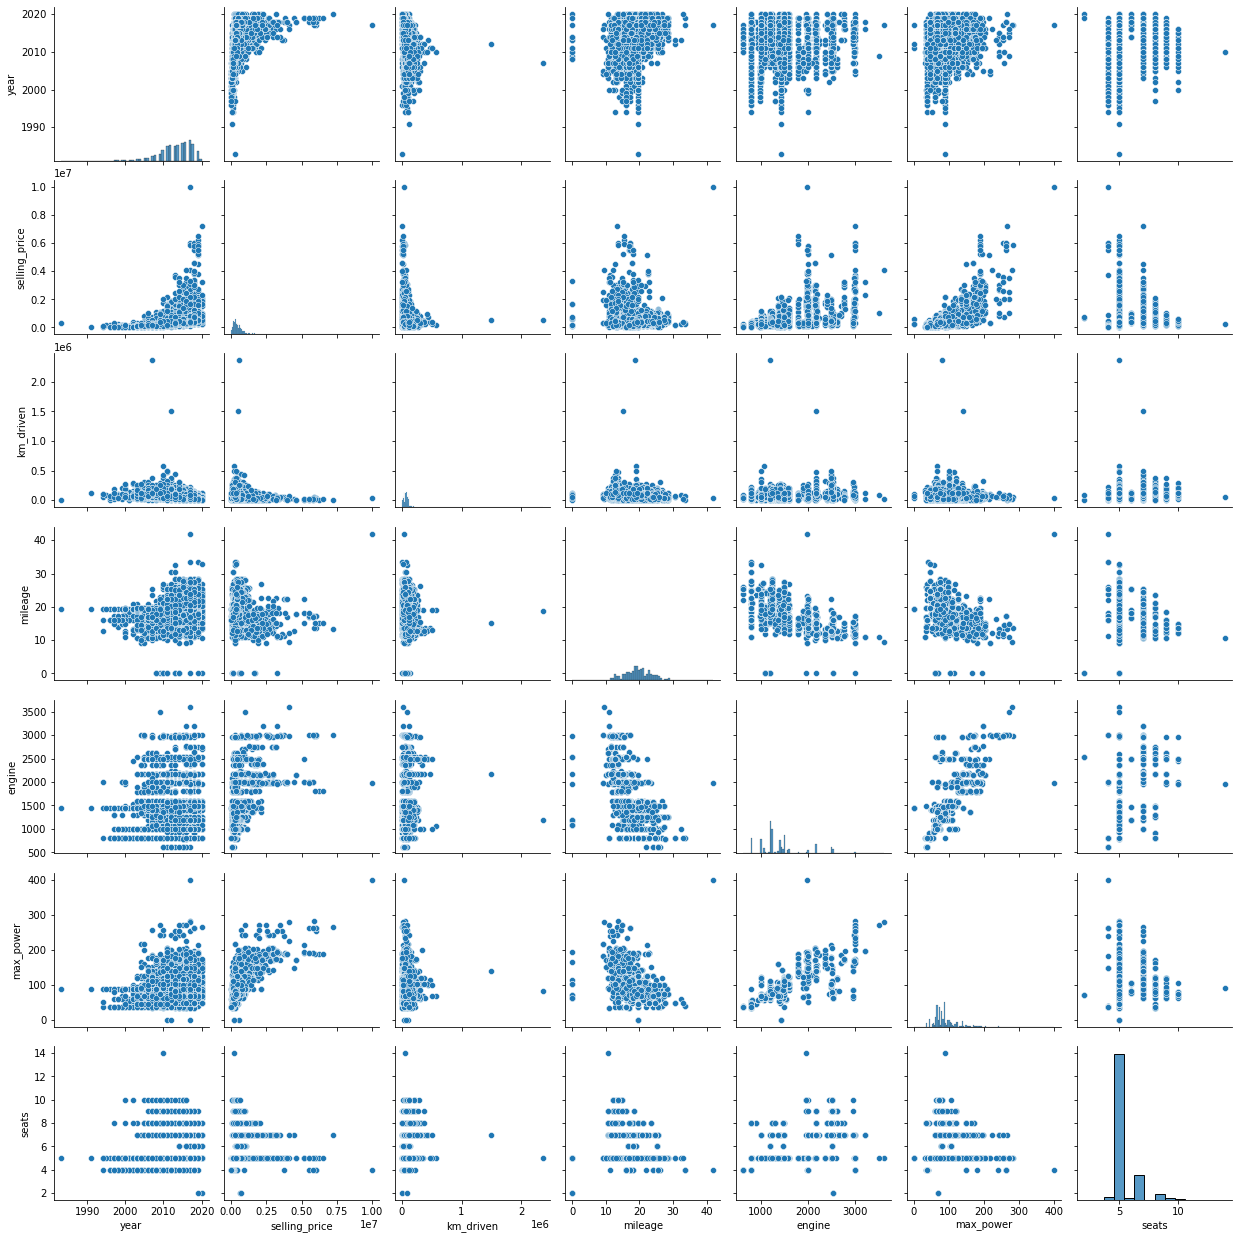

In [52]:
sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

На графике наглядна квадратичная зависимость года от целевой переменной. Это и логично - инфляция увеличивает цену на машины. Также я бы отметил линейную зависимость между целевой переменной и max_power. Это тоже логично - чем мощнее двигатель, тем дороже машина.

Признак max_power линейно зависим от engine. Остальные не то что бы сильно скоррелированы.

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

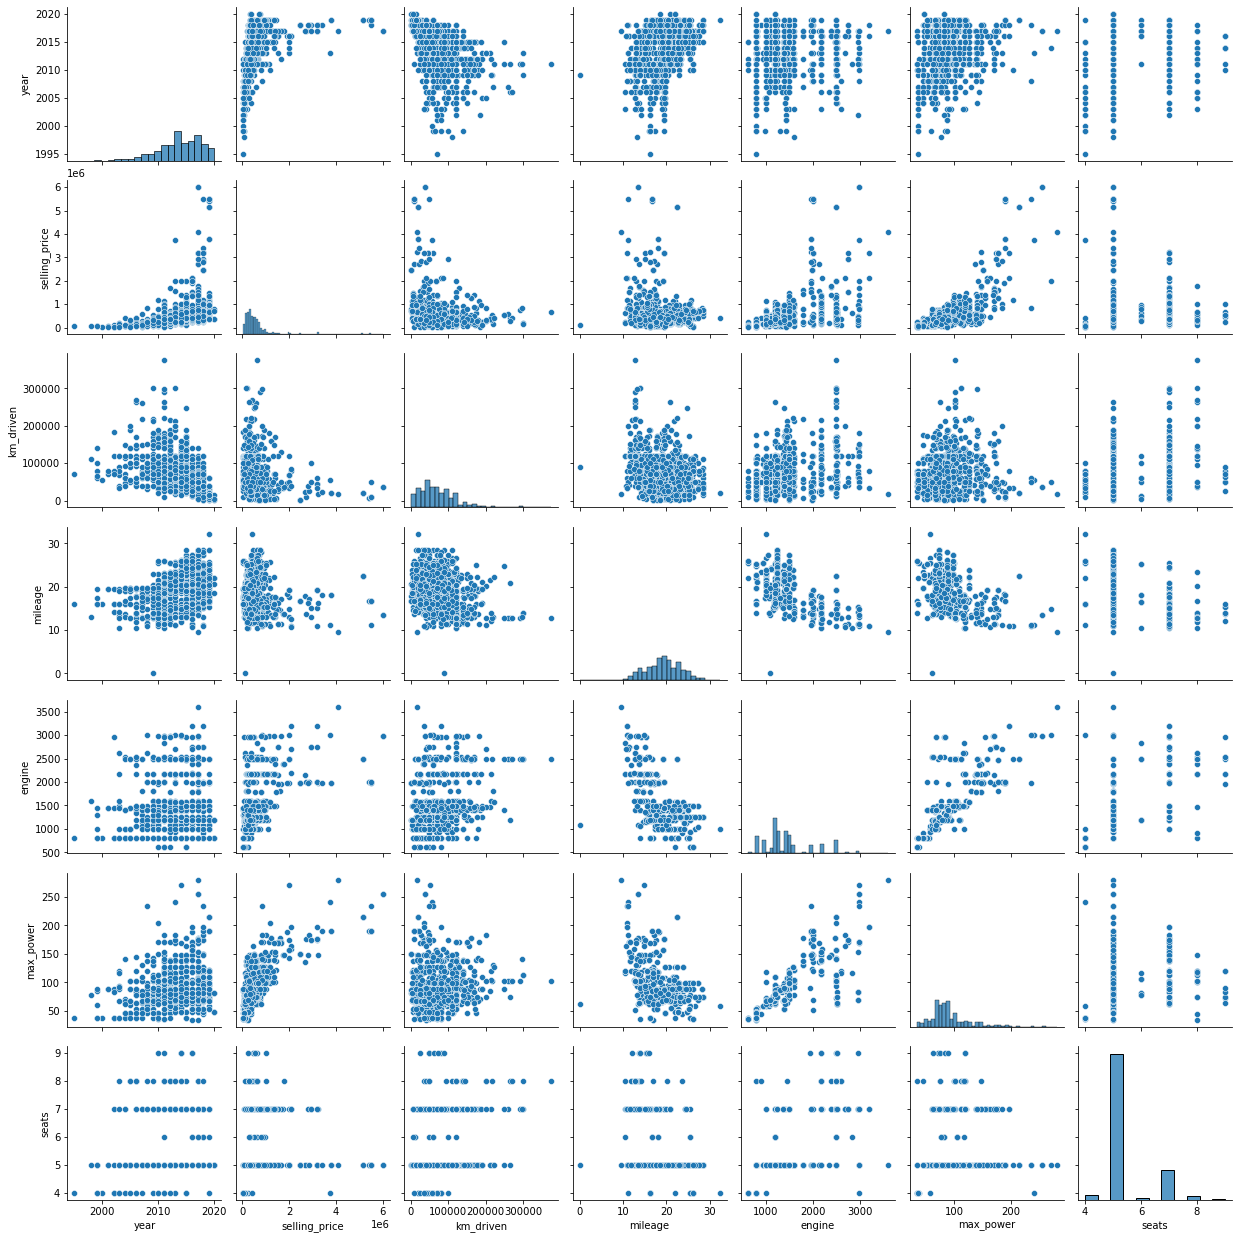

In [53]:
sns.pairplot(df_test)

В целом совокупности оказались похожими - примерно каждая фича скорелирована также, как и в трейне

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

In [58]:
df_train_num = df_train.drop(columns=['name', 'fuel', 'seller_type', 'transmission', 'owner',])

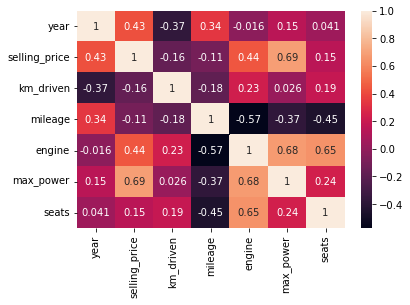

In [59]:
sns.heatmap(df_train_num.corr(), annot = True)

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

1) 'year' и 'engine'

2) Между 'engine' и 'max_power', а также между целевой переменной и 'max_power' довольно сильная положительная линейная зависимость. Это мы еще отметили на стадии рассмотрения графика pairplot. Также довольно сильная связь между 'engine' и 'seats'.

3) Да, поскольку присутствует небольшая отрицательная линейная зависимость

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

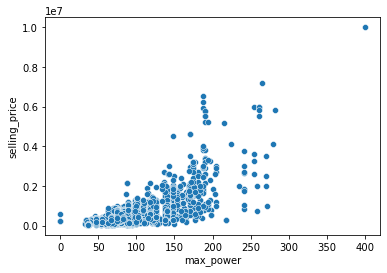

In [60]:
sns.scatterplot(data=df_train_num, x="max_power", y="selling_price")


### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

Я считаю, что было бы посмотреть на категориальные признаки. Построим pie plot для каждого.

In [89]:
cat_cols = ['fuel', 'seller_type', 'transmission', 'owner']

fuel


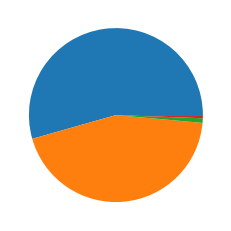

Diesel    3177
Petrol    2579
CNG         50
LPG         34
Name: fuel, dtype: int64

seller_type


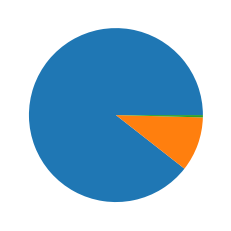

Individual          5223
Dealer               592
Trustmark Dealer      25
Name: seller_type, dtype: int64

transmission


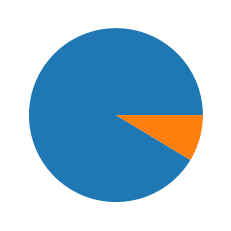

Manual       5336
Automatic     504
Name: transmission, dtype: int64

owner


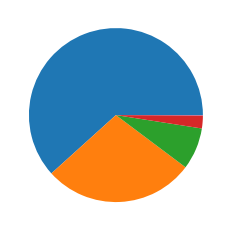

First Owner             3603
Second Owner            1639
Third Owner              454
Fourth & Above Owner     140
Test Drive Car             4
Name: owner, dtype: int64



In [90]:
for elem in cat_cols:
    a = df_train[elem].value_counts()
    print(elem)
    plt.pie(a)
    plt.show()
    print(a)
    print()


Только топливо fuel можно назвать сбалансированным признаком - поскольку в основном машины используют два популярных вида топлива - это бензин и солярка. Однако остальные - такими не являются. Самыми сильно несбалансированными являются "transmission" и "seller_type". Большинство машин имеют ручное управление, а среди типа продавцов посредники в меньшинстве.

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [417]:
df_train['selling_price']

0       450000
1       370000
2       225000
3       130000
4       440000
         ...  
5835    120000
5836    260000
5837    320000
5838    135000
5839    382000
Name: selling_price, Length: 5840, dtype: int64

In [418]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5


In [419]:
y_train = df_train['selling_price']
X_train = df_train.drop(columns=['name', 'selling_price', 'fuel', 'seller_type', 'transmission', 'owner',])

In [420]:
assert X_train.shape == (5840, 6)

In [421]:
y_test = df_test['selling_price']
X_test = df_test.drop(columns=['name', 'selling_price', 'fuel', 'seller_type', 'transmission', 'owner',])

In [422]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [423]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

$R^2$ :

In [424]:
print('Train:', r2_score(y_train, y_pred_train))
print('Test:', r2_score(y_test, y_pred_test))

Train: 0.5920479283423334
Test: 0.5937166087588612


MSE:

In [425]:
print('Train:', MSE(y_train, y_pred_train))
print('Test:', MSE(y_test, y_pred_test))

Train: 116934703949.61101
Test: 233543294967.0328


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [426]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_norm_np = scaler.fit_transform(X_train)
X_train_norm = pd.DataFrame(data=X_train_norm_np)
X_test_norm_np = scaler.fit_transform(X_test)
X_test_norm = pd.DataFrame(data=X_test_norm_np)

In [427]:
model_scal = LinearRegression()
model_scal.fit(X_train_norm, y_train)
y_pred_test = model_scal.predict(X_test_norm)
y_pred_train = model_scal.predict(X_train_norm)

In [428]:
print('Train:', r2_score(y_train, y_pred_train))
print('Test:', r2_score(y_test, y_pred_test))

Train: 0.5920479283423333
Test: 0.5652258610022143


In [429]:
print('Train:', MSE(y_train, y_pred_train))
print('Test:', MSE(y_test, y_pred_test))

Train: 116934703949.61104
Test: 249920590349.04538


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [430]:
model_scal.coef_

array([158271.58743823, -43330.45021584,  26666.71954803,  61018.89821749,
       321130.52226026, -23030.91712375])

In [431]:
X_train

,year,km_driven,mileage,engine,max_power,seats
0,2014,145500,23.40,1248,74.00,5
1,2014,120000,21.14,1498,103.52,5
2,2010,127000,23.00,1396,90.00,5
3,2007,120000,16.10,1298,88.20,5
4,2017,45000,20.14,1197,81.86,5
...,...,...,...,...,...,...
5835,2008,191000,17.92,1086,62.10,5
5836,2013,50000,18.90,998,67.10,5
5837,2013,110000,18.50,1197,82.85,5
5838,2007,119000,16.80,1493,110.00,5


Наиболее информативным оказался признак max_power, поскольку имеет наибольший вес в коэффициентах модели. Помимо прочего, при построении heatmap выше мы тоже могли убедиться в сильной скоррелированности этой фичи от целевой переменной

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [432]:
from sklearn.linear_model import Lasso

model_lasso = Lasso()

model_lasso.fit(X_train_norm, y_train)

y_pred_test_lasso = model_lasso.predict(X_test_norm)

y_pred_train_lasso = model_lasso.predict(X_train_norm)

$R^2$ :

In [433]:
print('Train:', r2_score(y_train, y_pred_train_lasso))
print('Test:', r2_score(y_test, y_pred_test_lasso))

Train: 0.5920479283069197
Test: 0.5652246054394863


MSE:

In [434]:
print('Train:', MSE(y_train, y_pred_train_lasso))
print('Test:', MSE(y_test, y_pred_test_lasso))

Train: 116934703959.76196
Test: 249921312082.3549


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [435]:
model_lasso.coef_

array([158271.29927533, -43329.33666816,  26664.87725063,  61014.07276967,
       321131.43039003, -23028.0417642 ])

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [436]:
from sklearn.model_selection import GridSearchCV


model_lasso = Lasso()

alphas = [1.0, 1.1, 10, 100, 1000]

tuned_parameters = [{"alpha": alphas}]

n_folds = 10

clf = GridSearchCV(model_lasso, tuned_parameters, cv=n_folds)
clf.fit(X_train_norm, y_train)


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid=[{'alpha': [1.0, 1.1, 10, 100, 1000]}])

In [437]:
r2_score(y_train, clf.predict(X_train_norm))

0.5920135562008118

In [438]:
clf.best_index_

4

In [439]:
clf.best_params_

{'alpha': 1000}

In [440]:
clf.best_estimator_

Lasso(alpha=1000)

In [446]:
a = X_train_norm.head(1)
a = a.to_numpy()
a

,0,1,2,3,4,5
0,0.13957,1.191152,0.995369,-0.386797,-0.446033,-0.434419


In [449]:
a.shape

(1, 6)

In [455]:
a[0][0] = 0
a[0][1] = 0
a[0][2] = 0
a[0][3] = 0
a[0][4] = 0
a[0][5] = 0

In [456]:
clf.predict(a)

array([522960.09109589])

In [444]:
import pickle

In [445]:
filename = 'weights.pickle'
pickle.dump(clf, open(filename, 'wb'))

In [377]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_train_norm, y_train)

In [379]:
loaded_model.predict(X_train_norm)[0]

362825.66616208316

In [282]:
result

0.5920135562008118

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

Гридсерч обучается для каждого значения параметра и по каждому фолду. У меня 5 значений параметров и 10 фолдов. Значит 50 раз

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [149]:
from sklearn.linear_model import ElasticNet

model_elastic = ElasticNet()

alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 1.0]

tuned_parameters = [{"alpha": alphas}]

n_folds = 10

clf = GridSearchCV(model_elastic, tuned_parameters, cv=n_folds)
clf.fit(X_train_norm, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid=[{'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 1.0]}])

In [150]:
clf.best_index_

2

In [152]:
clf.best_params_

{'alpha': 0.3}

In [153]:
clf.best_estimator_

ElasticNet(alpha=0.3)

In [156]:
model_elastic = ElasticNet(alpha=0.3)
model_elastic.fit(X_train_norm, y_train)
y_pred_train_elastic = model_elastic.predict(X_train_norm)
y_pred_test_elastic = model_elastic.predict(X_test_norm)


$R^2$ :

In [157]:
print('Train:', r2_score(y_train, y_pred_train_elastic))
print('Test:', r2_score(y_test, y_pred_test_elastic))

Train: 0.5843192148341674
Test: 0.5327746825868973


MSE:

In [159]:
print('Train:', MSE(y_train, y_pred_train_elastic))
print('Test:', MSE(y_test, y_pred_test_elastic))

Train: 119150049547.2359
Test: 268574454366.2875


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

Лучший параметр соответствует значению 0.3

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [337]:
df_train.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74.0,5


In [338]:
X_train_cat = df_train.drop(columns=['selling_price', 'name'])

In [339]:
assert X_train_cat.shape == (5840, 10)

In [340]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [341]:
X_train_cat['seats'] = X_train_cat['seats'].astype(str)
X_train_cat_dum = pd.get_dummies(X_train_cat, drop_first=True)

In [342]:
X_train_cat_dum.shape

(5840, 23)

In [343]:
scaler = StandardScaler()
X_train_norm_np = scaler.fit_transform(X_train_cat_dum)
X_train_norm = pd.DataFrame(data=X_train_norm_np)
X_train_norm

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.139570,1.191152,0.995369,-0.386797,-0.446033,0.915539,-0.076525,-0.889304,0.343702,-0.065568,...,-0.02618,-0.290332,-0.013087,-0.018509,-0.127903,0.514409,-0.091035,-0.39841,-0.183878,-0.10854
1,0.139570,0.766619,0.428330,0.129194,0.487586,0.915539,-0.076525,-0.889304,0.343702,-0.065568,...,-0.02618,-0.290332,-0.013087,-0.018509,-0.127903,0.514409,-0.091035,-0.39841,-0.183878,-0.10854
2,-0.837167,0.883158,0.895008,-0.081330,0.059994,0.915539,-0.076525,-0.889304,0.343702,-0.065568,...,-0.02618,-0.290332,-0.013087,-0.018509,-0.127903,0.514409,-0.091035,-0.39841,-0.183878,-0.10854
3,-1.569719,0.766619,-0.836217,-0.283598,0.003066,-1.092252,-0.076525,1.124475,0.343702,-0.065568,...,-0.02618,-0.290332,-0.013087,-0.018509,-0.127903,0.514409,-0.091035,-0.39841,-0.183878,-0.10854
4,0.872122,-0.482007,0.177427,-0.492059,-0.197447,-1.092252,-0.076525,1.124475,0.343702,-0.065568,...,-0.02618,-0.290332,-0.013087,-0.018509,-0.127903,0.514409,-0.091035,-0.39841,-0.183878,-0.10854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,-1.325535,1.948653,-0.379575,-0.721159,-0.822390,-1.092252,-0.076525,1.124475,0.343702,-0.065568,...,-0.02618,-0.290332,-0.013087,-0.018509,-0.127903,0.514409,-0.091035,-0.39841,-0.183878,-0.10854
5836,-0.104614,-0.398765,-0.133691,-0.902787,-0.664257,-1.092252,-0.076525,1.124475,0.343702,-0.065568,...,-0.02618,-0.290332,-0.013087,-0.018509,-0.127903,0.514409,-0.091035,-0.39841,-0.183878,-0.10854
5837,-0.104614,0.600136,-0.234052,-0.492059,-0.166137,-1.092252,-0.076525,1.124475,0.343702,-0.065568,...,-0.02618,-0.290332,-0.013087,-0.018509,-0.127903,0.514409,-0.091035,-0.39841,-0.183878,-0.10854
5838,-1.569719,0.749971,-0.660586,0.118874,0.692526,0.915539,-0.076525,-0.889304,0.343702,-0.065568,...,-0.02618,-0.290332,-0.013087,-0.018509,-0.127903,0.514409,-0.091035,-0.39841,-0.183878,-0.10854


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [344]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

model_ridge = Ridge()

alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 5.0, 10.0, 100.0, 1000.0, 10000.0]

tuned_parameters = [{"alpha": alphas}]

n_folds = 10

clf = GridSearchCV(model_ridge, tuned_parameters, cv=n_folds)
clf.fit(X_train_norm, y_train)
y_pred_train_ridge = clf.predict(X_train_norm)
# y_pred_test_ridge = clf.predict(X_test_norm)


In [345]:
clf.best_params_

{'alpha': 1000.0}

In [346]:
print('Train:', r2_score(y_train, y_pred_train_ridge))


Train: 0.6582089327218021


In [347]:
print('Train:', MSE(y_train, y_pred_train_ridge))


Train: 97970423590.19127


Да, подобрав оптимальный параметр удалось улучшить качество на трейне, но не сильно

# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

Добавим новую фичу в виде квадрата года

In [466]:
year_square = df_train['year'] ** 2
year_square

0       4056196
1       4056196
2       4040100
3       4028049
4       4068289
         ...   
5835    4032064
5836    4052169
5837    4052169
5838    4028049
5839    4036081
Name: year, Length: 5840, dtype: int64

In [472]:
df_train['year_square'] = year_square

In [473]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,year_square
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,4056196
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,4056196
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,4040100
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,4028049
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5,4068289
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,5,4032064
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5,4052169
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5,4052169
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5,4028049


# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [348]:
def business_metrics(y_true, y_pred):
    error = y_test * 0.1
    good_pred = (abs(y_pred_test - y_test) <= error).sum()
    
    return (good_pred / len(y_test))

business_metrics(y_test, y_pred_test)

0.236

# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link